In [62]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#USING CROSS VALIDATION
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [63]:
df = pd.read_csv('../../datasets/parte1/dataset_cleaned1.csv')

In [64]:
X = df.drop(['EncodedRainTomorrow'], axis=1)
y = df['EncodedRainTomorrow'].to_frame()

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

In [66]:
param_grid = {
    'criterion': ['gini', 'entropy','ratio'],
    'max_depth': [5,7,9,11,13,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
clf = DecisionTreeClassifier(random_state= 2023)

# clf = DecisionTreeClassifier(random_state=2023)

In [67]:
# clf.fit(X_train, y_train)

# Use GridSearchCV para encontrar os melhores hiperparâmetros
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid,refit=True, verbose=2)
grid_search.fit(X, y)

#descobriu os melhores parametros

clf = grid_search.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.5s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.8s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   2.2s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.5s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=

/home/gabs/.conda/envs/daa1/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/home/gabs/.conda/envs/daa1/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabs/.conda/envs/daa1/lib/python3.10/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/gabs/.conda/envs/daa1/lib/python3.10/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_const

In [68]:
predictions = clf.predict(X_test)


In [69]:
print("%0.2f accuracy" % (accuracy_score(y_test, predictions)))

0.84 accuracy


In [70]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.95      0.90     29027
           1       0.71      0.48      0.57      8086

    accuracy                           0.84     37113
   macro avg       0.79      0.71      0.74     37113
weighted avg       0.83      0.84      0.83     37113



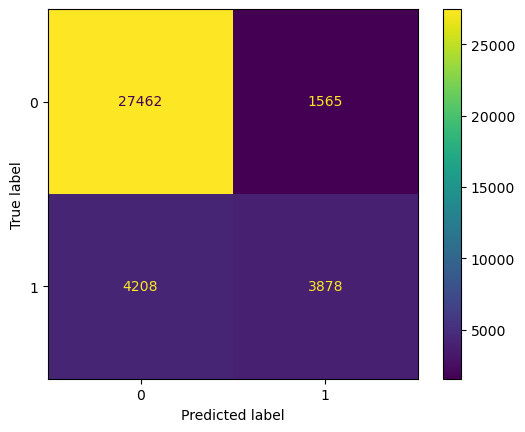

In [71]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions)
plt.show()